## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

## Exploring and preparing the datasets about misogyny/gender 

### Jigsaw

Exploring the posts' annotations wrt specific sensitive social categories (the post is identified through 'id'; in this file there isn't the post's text)

In [2]:
jigsaw_annotation = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Jigsaw/identity_individual_annotations.csv', index_col=None, header=0)
jigsaw_annotation

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
0,59856,211,none,none,none,none,none
1,59856,683,intellectual_or_learning none,none,none,none,none
2,59856,8899,none,none,none,none,none
3,59856,67,none,none,none,none,none
4,239579,8900,none,none,none,none,none
...,...,...,...,...,...,...,...
2597360,6333923,2477,none,none,none,atheist,none
2597361,6333923,3488,none,none,none,none,none
2597362,6333923,805,none,none,none,atheist,none
2597363,6333923,2493,none,none,other,atheist,none


Visualizing separatly
* disability
* gender & sexual_orientation
* race_or_ethnicity	
* religion	

In [3]:
disability=jigsaw_annotation[(jigsaw_annotation.disability!='none')]
disability

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
1,59856,683,intellectual_or_learning none,none,none,none,none
176,240813,8908,psychiatric_or_mental_illness,none,none,none,none
177,240813,967,psychiatric_or_mental_illness,none,none,none,none
178,240813,1709,psychiatric_or_mental_illness,none,none,none,none
179,240813,8910,psychiatric_or_mental_illness,none,none,none,none
...,...,...,...,...,...,...,...
2596728,6329399,454,psychiatric_or_mental_illness,none,none,none,none
2596730,6329399,541,psychiatric_or_mental_illness,none,none,none,none
2596875,6330362,3613,other,none,none,none,none
2597084,6331431,2135,other,male,none,christian,homosexual_gay_or_lesbian


In [3]:
gender=jigsaw_annotation[(jigsaw_annotation.gender!='none')&(jigsaw_annotation.sexual_orientation!='none')]
gender

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
241,240978,1221,none,male female,none,none,homosexual_gay_or_lesbian
309,241137,2213,none,female transgender,none,none,homosexual_gay_or_lesbian
310,241137,2448,none,female,none,none,homosexual_gay_or_lesbian
311,241137,935,none,female transgender,none,none,homosexual_gay_or_lesbian
312,241137,8921,none,female transgender,none,none,homosexual_gay_or_lesbian
...,...,...,...,...,...,...,...
2597084,6331431,2135,other,male,none,christian,homosexual_gay_or_lesbian
2597085,6331431,3368,none,male,none,christian,homosexual_gay_or_lesbian
2597086,6331431,3532,none,male female,none,christian,homosexual_gay_or_lesbian
2597087,6331431,986,none,male female,none,christian,homosexual_gay_or_lesbian


In [5]:
ratial=jigsaw_annotation[(jigsaw_annotation.race_or_ethnicity!='none')]
ratial

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
43,239852,422,none,none,asian,none,none
62,239980,8903,none,female,other,none,none
112,240528,1183,none,none,asian,none,none
113,240528,1950,none,none,asian,none,none
116,240528,1601,none,none,asian,none,none
...,...,...,...,...,...,...,...
2597326,6333563,303,none,none,other,none,none
2597331,6333584,9361,none,none,asian,none,none
2597332,6333584,5488,none,none,asian,none,none
2597333,6333584,501,none,none,asian,none,none


In [6]:
religious=jigsaw_annotation[(jigsaw_annotation.religion!='none')]
religious

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
48,239853,1545,none,none,none,christian,none
51,239853,1688,none,none,none,christian,none
54,239853,715,none,none,none,other,none
58,239893,1168,none,none,none,christian,none
59,239893,8908,none,none,none,christian,none
...,...,...,...,...,...,...,...
2597359,6333923,4721,none,none,none,atheist,none
2597360,6333923,2477,none,none,none,atheist,none
2597362,6333923,805,none,none,none,atheist,none
2597363,6333923,2493,none,none,other,atheist,none


Exploring unique values in each column, in order to explore the items/types present in the macro-categories

In [7]:
jigsaw_annotation.disability.value_counts()

none                                                                     2533981
psychiatric_or_mental_illness                                              46462
intellectual_or_learning                                                    5092
physical                                                                    4659
other                                                                       3965
physical intellectual_or_learning psychiatric_or_mental_illness              764
physical psychiatric_or_mental_illness                                       748
physical intellectual_or_learning                                            465
intellectual_or_learning psychiatric_or_mental_illness                       317
other none                                                                   188
psychiatric_or_mental_illness none                                           138
psychiatric_or_mental_illness other                                          137
physical none               

In [8]:
jigsaw_annotation.gender.value_counts()

none                             1973921
female                            233569
male                              209166
male female                       137517
transgender                        30474
other                               2596
female transgender                  2503
male transgender                    2498
male female transgender             2280
male none                           1169
female none                          646
male female none                     221
transgender none                     218
other none                           190
male female other                     98
transgender other                     93
male other                            75
female other                          66
male female transgender other         22
female transgender none               11
female transgender other               9
male other none                        7
male transgender other                 4
transgender other none                 4
female other non

In [9]:
jigsaw_annotation.sexual_orientation.value_counts()

none                                                          2469388
homosexual_gay_or_lesbian                                       96340
heterosexual                                                     8792
homosexual_gay_or_lesbian bisexual                               6650
heterosexual homosexual_gay_or_lesbian                           6008
other                                                            4609
bisexual                                                         2865
homosexual_gay_or_lesbian bisexual other                          654
homosexual_gay_or_lesbian other                                   486
heterosexual homosexual_gay_or_lesbian bisexual                   469
homosexual_gay_or_lesbian none                                    301
heterosexual homosexual_gay_or_lesbian other                      148
other none                                                        145
heterosexual none                                                 136
heterosexual homosex

In [10]:
jigsaw_annotation.race_or_ethnicity.value_counts()

none                              2217610
white                              139319
black                               75821
asian                               43252
black white                         38059
latino                              29551
other                               21579
black asian                          5374
black white asian                    3853
black white latino                   3685
black latino                         3145
white other                          2345
white latino                         1909
white asian                          1851
black white asian latino             1671
asian other                          1287
black other                          1139
latino none                           955
black white other                     721
latino other                          720
black none                            656
white none                            511
asian latino                          485
black asian latino                

Moving to the training file

In [4]:
jigsaw_train_all = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Jigsaw/train.csv', index_col=None, header=0)
jigsaw_train_all

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


Keeping only the posts whose score is > 0 for: 
* bisexual, 
* female, 
* homosexual_gay_or_lesbian, 
* other_gender, 
* other_sexual_orientation, 
* transgender

and removing duplicate posts (if a post has a score > 0 in more than one of these selected columns)

In [5]:
# Attributes targeting offense
#sexual_explicit, severe_toxicity, obscene, identity_attack, insult, threat

# Attributes targeting gender & sexual orientation
#bisexual, female, homosexual_gay_or_lesbian, other_gender, other_sexual_orientation, transgender
jigsaw_gender=jigsaw_train_all[(jigsaw_train_all.bisexual>0)] 
jigsaw_gender=jigsaw_gender.append(jigsaw_train_all[(jigsaw_train_all.female>0)])
jigsaw_gender=jigsaw_gender.append(jigsaw_train_all[(jigsaw_train_all.homosexual_gay_or_lesbian>0)])
jigsaw_gender=jigsaw_gender.append(jigsaw_train_all[(jigsaw_train_all.other_gender>0)])
jigsaw_gender=jigsaw_gender.append(jigsaw_train_all[(jigsaw_train_all.other_sexual_orientation>0)])
jigsaw_gender=jigsaw_gender.append(jigsaw_train_all[(jigsaw_train_all.transgender>0)])

jigsaw_gender=jigsaw_gender.drop_duplicates(subset=['id'])
jigsaw_gender[['id','target','comment_text','bisexual', 'female', 'homosexual_gay_or_lesbian', 'other_gender', 'other_sexual_orientation', 'transgender']]

,id,target,comment_text,bisexual,female,homosexual_gay_or_lesbian,other_gender,other_sexual_orientation,transgender
422,240493,0.0,"Totally agree, star trek in the park was a bla...",0.250000,0.000000,0.250000,0.000000,0.0,0.000000
1975,243462,0.3,"Other than the inherent hypocricy, it really d...",0.250000,0.750000,1.000000,0.000000,0.0,1.000000
2651,244330,0.2,"Here is fine example of an 'UN""civil comment. ...",0.100000,0.000000,0.100000,0.000000,0.1,0.000000
2889,244608,0.4,Dave - if the 13 year old were gay or bisexual...,1.000000,0.000000,0.833333,0.000000,0.0,0.000000
3563,245537,0.2,My understanding is that a PPS employee/fundam...,0.969821,0.002447,0.008157,0.001631,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1795812,6322150,0.5,There is just far too much floating debris in ...,0.000000,0.000000,0.000000,0.000000,0.0,0.166667
1798263,6325046,0.0,Every young lawyer who seeks a job with a Bay ...,0.000000,0.000000,0.000000,0.000000,0.0,0.166667
1800973,6328549,0.2,"First, the fiasco of taxing the employee disco...",0.000000,0.000000,0.000000,0.000000,0.0,0.833333
1801190,6328853,0.7,Radical Dems are the new hate group. They hat...,0.000000,0.000000,0.000000,0.000000,0.0,0.800000


Keeping only columns that matters to us

In [6]:
jigsaw_gender = jigsaw_gender.rename(columns={'comment_text': 'text','target': 'misogynous'})
jigsaw_gender

,id,misogynous,text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
422,240493,0.0,"Totally agree, star trek in the park was a bla...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,32846,approved,0,0,0,1,0,0.000000,4,4
1975,243462,0.3,"Other than the inherent hypocricy, it really d...",0.000000,0.000000,0.200000,0.100000,0.000000,0.0,0.0,...,37890,approved,0,0,0,2,0,0.100000,4,10
2651,244330,0.2,"Here is fine example of an 'UN""civil comment. ...",0.000000,0.000000,0.000000,0.200000,0.200000,0.0,0.0,...,36937,approved,0,0,0,1,0,0.000000,10,5
2889,244608,0.4,Dave - if the 13 year old were gay or bisexual...,0.000000,0.100000,0.400000,0.200000,0.000000,0.0,0.0,...,39527,approved,0,0,0,1,0,0.000000,6,10
3563,245537,0.2,My understanding is that a PPS employee/fundam...,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.0,...,39665,approved,0,0,0,0,0,0.000000,1226,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795812,6322150,0.5,There is just far too much floating debris in ...,0.000000,0.100000,0.200000,0.400000,0.000000,0.0,0.0,...,398789,approved,0,0,0,1,0,0.000000,6,10
1798263,6325046,0.0,Every young lawyer who seeks a job with a Bay ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,397035,approved,0,0,0,0,0,0.000000,6,4
1800973,6328549,0.2,"First, the fiasco of taxing the employee disco...",0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0.0,...,399258,approved,0,0,0,8,2,0.000000,6,5
1801190,6328853,0.7,Radical Dems are the new hate group. They hat...,0.071429,0.071429,0.685714,0.542857,0.028571,0.0,0.0,...,399307,rejected,0,0,0,0,0,0.028571,10,70


In [7]:
r4 = jigsaw_gender[['text','misogynous']]

In [8]:
r4

,text,misogynous
422,"Totally agree, star trek in the park was a bla...",0.0
1975,"Other than the inherent hypocricy, it really d...",0.3
2651,"Here is fine example of an 'UN""civil comment. ...",0.2
2889,Dave - if the 13 year old were gay or bisexual...,0.4
3563,My understanding is that a PPS employee/fundam...,0.2
...,...,...
1795812,There is just far too much floating debris in ...,0.5
1798263,Every young lawyer who seeks a job with a Bay ...,0.0
1800973,"First, the fiasco of taxing the employee disco...",0.2
1801190,Radical Dems are the new hate group. They hat...,0.7


Mapping the score to 0 or 1 (binary encoding). The official competition considered each post with target >= 0.5 to be toxic (https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data?select=train.csv) but we noticed that we need a precise set, so we raised the score to 0.6.

In [9]:
r4['misogynous'] = np.where((r4['misogynous'] >= 0.6), 1, r4['misogynous'])
r4['misogynous'] = np.where((r4['misogynous'] < 0.6), 0, r4['misogynous'])
r4

/Users/Marta/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Marta/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,misogynous
422,"Totally agree, star trek in the park was a bla...",0.0
1975,"Other than the inherent hypocricy, it really d...",0.0
2651,"Here is fine example of an 'UN""civil comment. ...",0.0
2889,Dave - if the 13 year old were gay or bisexual...,0.0
3563,My understanding is that a PPS employee/fundam...,0.0
...,...,...
1795812,There is just far too much floating debris in ...,0.0
1798263,Every young lawyer who seeks a job with a Bay ...,0.0
1800973,"First, the fiasco of taxing the employee disco...",0.0
1801190,Radical Dems are the new hate group. They hat...,1.0


For now, because these texts are from a different genres than the others (social media posts, mainly from Twitter) we don't use them when building the test's suite for Automatic Misogyny Detection. The texts from Jigsaw are long, often well structured, no emojis or unusual punctuation or slang spelling grammar. 

In [10]:
r4.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/AMI_Jigsaw.csv')

### HateSpeech Waasem

We already pre-processed the json data and fixed some rows

In [11]:
#json_path= '/Users/Marta/CheckList - FBK/Evaluation_Datasets/hatespeech/sexism.json'
#r3=pd.read_json(json_path, orient = 'records', lines=True)
#r3 = r3.drop(['Annotation','id_str','place','id','source','favorite_count','retweeted','in_reply_to_user_id','in_reply_to_status_id_str','in_reply_to_user_id_str','contributors','in_reply_to_status_id','user','created_at','retweet_count','in_reply_to_screen_name','geo','entities','coordinates','favorited','truncated','lang','is_quote_status','possibly_sensitive_appealable','possibly_sensitive','extended_entities','retweeted_status'], axis='columns')
#r3['misogynous']=1
r3=pd.read_excel('/Users/Marta/CheckList - FBK/Evaluation_Datasets/hatespeech/waasem_sexist.xlsx', index_col=None, header=0)

In [12]:
r3=r3[['text','misogynous']]
r3

,text,misogynous
0,:D @nkrause11 Dudes who go to culinary school:...,1.0
1,".""@DustyPee: #cuntandandre Best thing I've hea...",1.0
2,.@11twiggins So you oppose equal gender rights...,1.0
3,.@38fanda Not even slightly...,1.0
4,.@a2daj123456 Thanks. I think it's hilarious....,1.0
...,...,...
3424,Your cooking is still shit Kat #mkr,1.0
3425,YOUR WIT HATH BLINDED ME @TheRealTempus @YesYo...,1.0
3426,Yup there still hot blondes #mkr,1.0
3427,Zebra undies #MKR chic in pink dress,1.0


In [13]:
r3.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/AMI_Waasem.csv')

### HatEval 

We select only posts with target = misogyny and language = english. Then we keep only the colomns that matters to us

In [14]:
h = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/2019hateval/hateval2019_target.csv', index_col=None, header=0)
r0 = h[(h.target == "mis") & (h.language == 'en')].rename(columns={'HS': 'misogynous'})
r0 = r0.drop(['id', 'target', 'language', 'set', 'TR', 'AG'], axis='columns')
r0

,text,misogynous
4500,Please tell me why the bitch next to me in the...,1
4501,@emmasharp003 @Ldrake48Lee Bitch shut the fuck up,1
4502,"@abzdafab Dear cunt, please shut the fuck up.",1
4503,RT @queenofdragonsb: Pls shut the fuck up bitch,1
4504,"RT @21bIvck: ""when u gonna get your license"" S...",1
...,...,...
12966,you can never take a L off a real bitch😩 im ho...,1
12967,@Brian_202 likes to call me a cunt & a bitch b...,1
12968,@kusha1a @Camio_the_wise @shoe0nhead 1. Never ...,1
12969,If i see and know you a hoe why would i hit yo...,1


In [15]:
r0.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/AMI_HatEval.csv')

### SBF

In [16]:
s0=[]
s1 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.dev.csv', index_col=None, header=0)
s2 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.trn.csv', index_col=None, header=0)
s3 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.tst.csv', index_col=None, header=0) 
s0.append(s1)
s0.append(s2)
s0.append(s3)
s = pd.concat(s0, axis=0, ignore_index=True)

In [17]:
s

,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,annotatorPolitics,annotatorRace,annotatorAge,post,targetMinority,targetCategory,targetStereotype
0,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,2428559182657536645,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,29.0,Every half-breed cop in America is trying to r...,police officers,social,rape women
1,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,2428559182657536645,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,29.0,Every half-breed cop in America is trying to r...,police officers,social,NaN
2,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,mixed folks,race,mixed folks are rapists.
3,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,mixed folks,race,mixed folks like white women.
4,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,cops,social,cops can't be trusted.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147134,1.0,0.00,0.0,NaN,1.0,man,NaN,NaN,0.0,7891575995618716029,39O6Z4JLX2RE3MH5G51KIM2HDSKXVR,mod-liberal,white,40.0,Minimum attractiveness to get women per height...,women,gender,women are shallow
147135,1.0,0.00,0.0,NaN,1.0,man,NaN,NaN,0.0,7891575995618716029,39O6Z4JLX2RE3MH5G51KIM2HDSKXVR,mod-liberal,white,40.0,Minimum attractiveness to get women per height...,women,gender,women care about a man's height
147136,0.0,1.00,0.0,NaN,1.0,man,NaN,NaN,NaN,7891575995618716029,3RDTX9JRTYVMR0YBVRSQW50WK7N79R,mod-liberal,white,40.0,"Always remember, it was normies that enacted t...",NaN,NaN,NaN
147137,0.0,0.66,0.0,NaN,0.5,man,NaN,NaN,NaN,-7790343187498138255,3RDTX9JRTYVMR0YBVRSQW50WK7N79R,cons,white,49.0,"Always remember, it was normies that enacted t...",NaN,NaN,NaN


In [18]:
s['targetCategory'].value_counts()

race        22453
gender      14655
culture     12617
victim       3265
disabled     3156
social       2324
body         1390
Name: targetCategory, dtype: int64

In [19]:
s['sexYN'].value_counts()

0.0    133768
1.0     12297
0.5      1074
Name: sexYN, dtype: int64

In [20]:
s['offensiveYN'].value_counts()

1.0    74211
0.0    57909
0.5    12529
Name: offensiveYN, dtype: int64

Selecting posts that have sex and offence intentions, from the categories: victim, gender, body. We then drop the duplicates (because each post is annotated from different annotators, maybe in a different way)

In [21]:
r5=s[s.targetCategory=='gender']
r5=r5.append(s[s.targetCategory=='victim'])
r5=r5.append(s[s.targetCategory=='body'])
#r5=r5.append(s[s.targetCategory=='social'])

r5=r5.drop_duplicates(subset=['post'])
r5

,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,annotatorPolitics,annotatorRace,annotatorAge,post,targetMinority,targetCategory,targetStereotype
20,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.5,-4671295340405687436,34ZTTGSNJXIPCOL9P2PO9DFF6CMHQQ,other,white,31.0,RT @nostalgic_mike: Aw y'all some hoes hating ...,women,gender,"women are ""hoes"""
25,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-7452610791699819066,3EPG8DX9LKKSWJ0ZON9QKBMFW795P6,liberal,asian,23.0,i wonder why girls can call eachotha bitches t...,women,gender,are hypocritical
42,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-3579354685786976851,379OL9DBSS856KUCI0IQ9IKTM8UY9J,mod-cons,white,35.0,Check his hoe for I check her &#128175;&#12812...,women,gender,women are sex objects
59,1.0,0.00,0.0,NaN,1.0,man,NaN,NaN,0.0,2588569829026181549,31JUPBOORNYLSG43UTNMFENMTN98LD,cons,white,40.0,RT @kxyIx: Females love stealing someone's boy...,women,gender,woman are hoes/sexually promiscuous
75,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,2385617559681638227,3V7ICJJAZAA8W6VPRD8FKZBCF7Z4BF,liberal,white,26.0,Trust a bitch I can't wife a bitch I can't,women,gender,women are bitches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143390,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,-6824717916856203450,3D1UCPY6GG34CCEEONJMJST5VY338B,libert,white,39.0,kids of yesterday use to work go to school and...,young people,body,they are lazy
143914,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-7297283282402353981,32FESTC2NHKQN9HAKJVS8NFOY2MUCU,liberal,hisp,28.0,"""Fat acceptance"" is absolutely degeneracy of t...",overweight/fat folks,body,fat people have no morals.
145967,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-366799570504194700,3YLTXLH3DF04CCKUPPAZ98P53EWHPT,mod-liberal,white,37.0,You incels are ugly\nThis is why you're incel,ugly folks,body,insinuates ugly people are undeserving of sex.
146519,1.0,0.33,0.0,NaN,1.0,woman,NaN,NaN,1.0,-5675095108694766721,30P8I9JKOIF513XVAZIPQ3BXKT85VN,liberal,white,55.0,"Im not ugly cause im fat, im fat because im ugly","overweight/fat folks, ugly folks",body,ugly people are fat


We map the score into 0 or 1

In [22]:
r5['offensiveYN'] = np.where((r5['offensiveYN'] >= 0.5), 1, r5['offensiveYN'])
r5['offensiveYN'] = np.where((r5['offensiveYN'] < 0.5), 0, r5['offensiveYN'])
r5=r5[['post', 'offensiveYN']]

In [23]:
r5 = r5.rename(columns={'post': 'text','offensiveYN': 'misogynous'})
r5

,text,misogynous
20,RT @nostalgic_mike: Aw y'all some hoes hating ...,1.0
25,i wonder why girls can call eachotha bitches t...,1.0
42,Check his hoe for I check her &#128175;&#12812...,1.0
59,RT @kxyIx: Females love stealing someone's boy...,1.0
75,Trust a bitch I can't wife a bitch I can't,1.0
...,...,...
143390,kids of yesterday use to work go to school and...,1.0
143914,"""Fat acceptance"" is absolutely degeneracy of t...",1.0
145967,You incels are ugly\nThis is why you're incel,1.0
146519,"Im not ugly cause im fat, im fat because im ugly",1.0


In [24]:
r5.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/AMI_SBF.csv')

### AMI

Using both training and testing, dropping the useless columns

In [25]:
r1 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/AMI2018/en_training.tsv', sep='\t', index_col=None, header=0)
r2 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/AMI2018/en_testing.tsv', sep='\t', index_col=None, header=0)
r1 = r1.drop(['id', 'misogyny_category', 'target'], axis='columns')
r2 = r2.drop(['id', 'misogyny_category', 'target'], axis='columns')

In [26]:
r2.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/AMI_AMI.csv')

### Golbeck

• #whitegenocide
• #fuckniggers
• #WhitePower
• #WhiteLivesMatter
• you fucking nigger
• fucking muslim
• fucking faggot
• religion of hate
• the jews
• feminist

In [27]:
tr = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Golbeck/train1.tsv', sep='\t', index_col=None, header=0)
ts = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Golbeck/test1.tsv', sep='\t', index_col=None, header=0)
dev = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Golbeck/dev1.tsv', sep='\t', index_col=None, header=0)

In [28]:
tr.columns

Index(['index', '#1 ID', '#2 ID', ' #1 String', '#2 String'], dtype='object')

In [29]:
tr=tr.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
tr = tr.rename(columns={' #1 String': 'text','index': 'misogynous'})
tr.head()

,misogynous,text
0,0,@judes_dickey 99% of jews r white. if u suppor...
1,0,"@antifemcomics still, consistency is indeed no..."
2,1,poor bitch.https://twitter.com/dailymail/statu...
3,1,"@bowen_sandra @virgehall @astroehlein oh dear,..."
4,0,@mrpolyatheist @mashudsworld where did i say t...


In [30]:
ts=ts.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
ts = ts.rename(columns={' #1 String': 'text','index': 'misogynous'})
ts.head()

,misogynous,text
0,0,@nancycato1 @s_chook @qldaah like zyklon b was...
1,0,no...theyre not really rt @brazenlyvirile: smf...
2,0,"@johncassidy is it the jews, john?"
3,0,"not sure if sexist or cleverly egalitarian, bu..."
4,0,@bbcnews now try this with open borders.


In [31]:
dev=dev.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
dev = dev.rename(columns={' #1 String': 'text','index': 'misogynous'})
dev.head()

,misogynous,text
0,0,@prince_gumbaii assault by random strangers/in...
1,0,@smittie61984 buyback? (i hate that fucking te...
2,1,“@chiefkeefejr: when martin thought we ate hit...
3,1,guys my head is actually bald and i look like ...
4,0,@dominant_traits @thatwillgettalk @andrewarlin...


In [32]:
texts=[]
labels=[]
for i in range (len(tr)):
    if 'feminist' in tr['text'][i]:
        texts.append(tr['text'][i])
        labels.append(tr['misogynous'][i])

for i in range (len(ts)):
    if 'feminist' in ts['text'][i]:
        texts.append(ts['text'][i])
        labels.append(ts['misogynous'][i])
        
for i in range (len(dev)):
    if 'feminist' in dev['text'][i]:
        texts.append(dev['text'][i])
        labels.append(dev['misogynous'][i])

r6=pd.DataFrame({'text': texts, 'misogynous': labels})
r6=r6.drop_duplicates(subset=['text'])

In [33]:
r6

,text,misogynous
0,"@antifemcomics still, consistency is indeed no...",0
1,@feministcampus @femfreq but there is no evide...,0
2,it makes me nauseous to read his sign. just bu...,0
3,no one gives up a benefit once they have it. e...,0
4,et c'est le point #sexisme du jour https://twi...,0
...,...,...
232,https://twitter.com/marredblank/status/6690224...,0
233,how feminists fail to understand the men's rig...,0
234,people disagree with bullshit feminist tactics...,1
235,it's amazing that feminists academics don't us...,0


In [34]:
r6.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/AMI_Golbeck.csv')

## Resulting dataset

Concatenating all in a unique dataframe

In [79]:
li = []

li.append(r0) #HatEval
li.append(r1) #AMI
li.append(r2) #AMI
li.append(r3) #Waasem
#li.append(r4) #Jigsaw
li.append(r5) #SCB
li.append(r6) #Golbeck

In [80]:
df = pd.concat(li, axis=0, ignore_index=True)
df

,text,misogynous
0,Please tell me why the bitch next to me in the...,1.0
1,@emmasharp003 @Ldrake48Lee Bitch shut the fuck up,1.0
2,"@abzdafab Dear cunt, please shut the fuck up.",1.0
3,RT @queenofdragonsb: Pls shut the fuck up bitch,1.0
4,"RT @21bIvck: ""when u gonna get your license"" S...",1.0
...,...,...
22255,https://twitter.com/marredblank/status/6690224...,0.0
22256,how feminists fail to understand the men's rig...,0.0
22257,people disagree with bullshit feminist tactics...,1.0
22258,it's amazing that feminists academics don't us...,0.0


## General Semantics

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22260 entries, 0 to 22259
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        22260 non-null  object 
 1   misogynous  22234 non-null  float64
dtypes: float64(1), object(1)
memory usage: 347.9+ KB


In [82]:
df.isnull().any()

text          False
misogynous     True
dtype: bool

In [83]:
df.isnull().sum()

text           0
misogynous    26
dtype: int64

In [84]:
df = df[df['misogynous'].notna()]

In [85]:
df['misogynous'].isna().sum()

0

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22234 entries, 0 to 22259
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        22234 non-null  object 
 1   misogynous  22234 non-null  float64
dtypes: float64(1), object(1)
memory usage: 521.1+ KB


In [87]:
print ('Numero di righe, numero di colonne: ', df.shape)

Numero di righe, numero di colonne:  (22234, 2)


## Exporting to a file

Exporting it in a csv file

In [78]:
df.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/dataset_AMI.csv')

## Qualitative Data Exploration: Linguistic Analysis

Selecting the tweets' text

In [47]:
df['text']

0        Please tell me why the bitch next to me in the...
1        @emmasharp003 @Ldrake48Lee Bitch shut the fuck up
2            @abzdafab Dear cunt, please shut the fuck up.
3          RT @queenofdragonsb: Pls shut the fuck up bitch
4        RT @21bIvck: "when u gonna get your license" S...
                               ...                        
22255    https://twitter.com/marredblank/status/6690224...
22256    how feminists fail to understand the men's rig...
22257    people disagree with bullshit feminist tactics...
22258    it's amazing that feminists academics don't us...
22259    @ultradavid @samuraibeandog @lifefire940 i'm a...
Name: text, Length: 22234, dtype: object

Tokenize with NLTK Tweet Tokenizer, specific for this genre 

In [48]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

tweetTok = TweetTokenizer()
tweets = df['text'].apply((lambda x: tweetTok.tokenize(x)))
tweetsString = []
for tw in tweets:
  tweetsString += tw
  tweetsString += ", "

In [49]:
from nltk.probability import FreqDist

fdist = FreqDist(tweetsString)
print(fdist)

<FreqDist with 32449 samples and 509977 outcomes>


Computing the most frequent tokens: mainly stop-words

In [50]:
fdist.most_common(20) # da eliminare le stop words

[(',', 30968),
 (' ', 22234),
 ('.', 14240),
 ('a', 11872),
 ('the', 9870),
 ('you', 8839),
 ('to', 7708),
 ('I', 6857),
 ('and', 6304),
 ('?', 5342),
 ('of', 4244),
 ('is', 4164),
 ('in', 3958),
 ('!', 3627),
 ('bitch', 3447),
 ('that', 3399),
 ('"', 3083),
 ('are', 3083),
 ('my', 2922),
 ('women', 2908)]

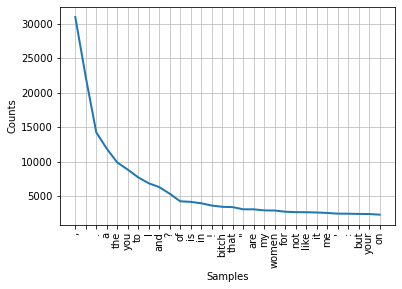

In [51]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [52]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"', '“', '”', '*', '&', 'I']
for x in punkt:
  stopWords.add(x)
print(stopWords)

{"you're", 'by', "mightn't", '”', 'you', 'had', 'how', 'did', 'my', "that'll", '“', 'theirs', 'once', 'any', 'now', '&', 'only', 'and', 'no', 'up', 'both', 'aren', 'so', 'until', 'than', 'he', 'don', 'an', 'again', 'to', 'on', "you'll", 'hadn', 'should', 'most', '’', 'yourselves', "it's", 'them', 'shouldn', '"', 'where', 'o', "don't", 'ma', 'wouldn', 'myself', 'herself', 'from', 'above', '.', '?', 'who', 'but', 'what', 'some', 't', 'very', 'm', '...', 'at', 'd', "needn't", "mustn't", 'against', 'further', 'yourself', 'themselves', 'his', 'with', 'her', 'that', 'mustn', "hadn't", "isn't", "'", 'why', 'our', 'do', 'there', 'have', '!', 'won', 'hers', 'we', 'while', 'itself', 'each', 'during', 'him', "she's", 'own', 'it', 'the', 'because', 'as', 'over', 'such', 'can', 'y', 'hasn', 'ours', 'below', 'whom', 'doing', 'under', 'haven', 'yours', 'having', '*', 'does', 'doesn', 'been', 'himself', 'other', 'be', ',', 'here', 'they', 're', '…', 'those', 'down', 'are', "didn't", 'of', 'needn', 'll

[nltk_data] Downloading package stopwords to /Users/Marta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtering the tweets removing the stop words from the list above

In [53]:
filtered_sent=[]
for w in tweetsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",tweetsString)
print("Filtered Sentence:",filtered_sent)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [54]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 32264 samples and 280798 outcomes>


In [55]:
fdistNoStop.most_common(30)

[(' ', 22234),
 ('bitch', 3447),
 ('women', 2908),
 ('like', 2662),
 ('RT', 1954),
 ('woman', 1553),
 ("I'm", 1494),
 ('get', 1394),
 ('men', 1387),
 ('You', 1286),
 ('sexist', 1213),
 ('rape', 1145),
 ('hoe', 1109),
 ('What', 1064),
 ('know', 1039),
 ('cunt', 1004),
 ('fuck', 999),
 ('ass', 981),
 ('one', 947),
 ('fucking', 927),
 ('The', 854),
 ('girl', 843),
 ('😂', 837),
 ('whore', 825),
 ('When', 811),
 ('A', 757),
 ('want', 750),
 ('If', 732),
 ('people', 714),
 ('think', 713)]

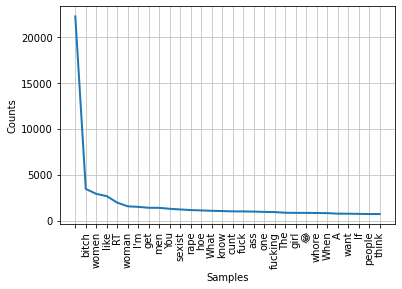

In [56]:
import matplotlib.pyplot as plt
fdistNoStop.plot(30,cumulative=False)
plt.show()

Log of frequencies

In [57]:
fdist.most_common()

[(',', 30968),
 (' ', 22234),
 ('.', 14240),
 ('a', 11872),
 ('the', 9870),
 ('you', 8839),
 ('to', 7708),
 ('I', 6857),
 ('and', 6304),
 ('?', 5342),
 ('of', 4244),
 ('is', 4164),
 ('in', 3958),
 ('!', 3627),
 ('bitch', 3447),
 ('that', 3399),
 ('"', 3083),
 ('are', 3083),
 ('my', 2922),
 ('women', 2908),
 ('for', 2734),
 ('not', 2674),
 ('like', 2662),
 ('it', 2622),
 ('me', 2555),
 ("'", 2457),
 (':', 2448),
 ('but', 2414),
 ('your', 2398),
 ('on', 2307),
 ('...', 2291),
 ('be', 2099),
 ('with', 2088),
 ('have', 1968),
 ('RT', 1954),
 ('all', 1841),
 ('do', 1766),
 ('they', 1692),
 ('her', 1641),
 ('just', 1629),
 ('about', 1574),
 ('’', 1569),
 ('woman', 1553),
 ('this', 1535),
 ("I'm", 1494),
 ('up', 1461),
 ('was', 1422),
 ('when', 1394),
 ('get', 1394),
 ('men', 1387),
 ('so', 1317),
 ('You', 1286),
 ('i', 1277),
 ("don't", 1263),
 ('at', 1214),
 ('sexist', 1213),
 ('if', 1203),
 ('what', 1196),
 ('can', 1156),
 ('out', 1153),
 ('rape', 1145),
 ('she', 1128),
 ('who', 1114),
 ('

In [58]:
fdist.N()

509977

In [59]:
conteggio = []
for key, value in fdist.most_common():
  conteggio.append(value) # append frequenza
freqOfFreq=FreqDist(conteggio) 
freqOfFreq #frequenza - numero di valori che compaiono frequenza volte 

FreqDist({1: 12449, 2: 10520, 3: 1877, 4: 1552, 5: 785, 6: 638, 7: 472, 8: 362, 9: 317, 10: 245, ...})

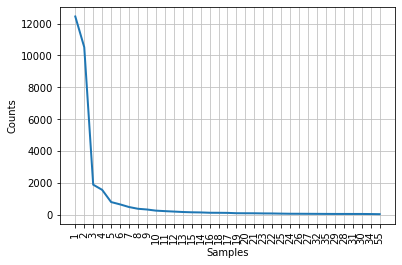

In [60]:
freqOfFreq.plot(35,cumulative=False)
plt.show()  

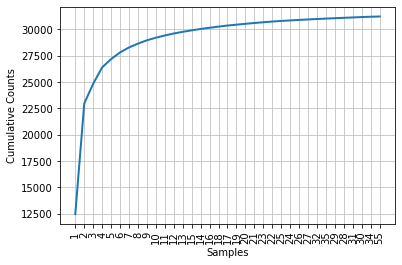

In [61]:
freqOfFreq.plot(35,cumulative=True)
plt.show()  

In [62]:
result = freqOfFreq.keys() 
data = list(result) # Convert object to a list 
numpyArrayKeys = np.array(data) # Convert list to an array 
print(numpyArrayKeys)

[30968 22234 14240 11872  9870  8839  7708  6857  6304  5342  4244  4164
  3958  3627  3447  3399  3083  2922  2908  2734  2674  2662  2622  2555
  2457  2448  2414  2398  2307  2291  2099  2088  1968  1954  1841  1766
  1692  1641  1629  1574  1569  1553  1535  1494  1461  1422  1394  1387
  1317  1286  1277  1263  1214  1213  1203  1196  1156  1153  1145  1128
  1114  1109  1083  1064  1056  1039  1016  1004   999   981   962   947
   945   932   927   911   872   863   854   843   837   825   811   787
   772   759   757   750   732   715   714   713   710   706   692   685
   682   665   660   656   647   645   642   612   609   608   602   600
   597   594   591   586   581   573   566   563   555   553   551   550
   529   525   523   514   511   505   504   497   492   488   482   475
   474   472   471   464   460   459   458   455   454   446   443   442
   441   436   430   429   426   425   424   422   416   411   407   406
   404   402   400   398   397   395   393   392   

In [63]:
result = freqOfFreq.values() 
data1 = list(result) # Convert object to a list 
numpyArrayValues = np.array(data1) # Convert list to an array 
print(numpyArrayValues)

[    1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     2     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     2     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     2     1     1     1     2     1
     2     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     2     1     1     1     1     1     1     1     1
     1     2     1     1     1     1     1     1     1     1     1     1
     2     1     1     1     1     1     3     1     1     1     1     1
     1     1     1     1     1     1     1     1   

The x variable represents the number of times a certain word appears in the text, and the y variable indicates the number of words that appear x times.



```
frequency - number of values appearing frequency times 
```

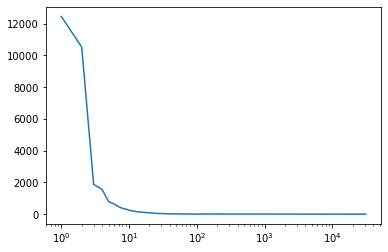

In [64]:
plt.plot(numpyArrayKeys,numpyArrayValues)
plt.xscale('log')
plt.show()

Hashtags

In [65]:
count = 0
hashtags = []
for x in tweets:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

4380
['#soundcloud', '#np', '#womenboycotttwitter', '#weinsteingate', '#findom', '#walletdrain', '#paypig', '#qotd', '#horror', '#firstofall', '#svt_project_vocal', '#pinwheel', '#wtf', '#cunt', '#womensuck', '#draft', '#womenareevil', '#evilwomen', '#womencantmakeburritos', '#sheforgottheguacamole', '#badburri', '#theredpill', '#', '#womenaredumb', '#triggered', '#idiots', '#shutthehellupwomen', '#ihatefemales', '#ilovefood', '#homecookedm', '#', '#mra', '#', '#100', '#babymomma', '#meetoo', '#marr', '#findom', '#lockherup', '#maledominance', '#maledomination', '#truth', '#didyouknow', '#maledominance', '#maledominance', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#teenwolf', '#menstruafacts', '#feminist', '#womenagainstfeminism', '#somebodytotris', '#menshealth', '#feminists', '#feminism', '#women', '#men', '#obviouschild', '#maledominance', '#yesallwomenbelonginthekitchen', '#yesallwomen

In [66]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(30)

1238


[('#mkr', 937),
 ('#notsexist', 253),
 ('#womensuck', 246),
 ('#', 78),
 ('#metoo', 77),
 ('#mkr2015', 77),
 ('#yesallmen', 59),
 ('#notallmen', 52),
 ('#womenagainstfeminism', 49),
 ('#maledominance', 38),
 ('#gamergate', 38),
 ('#questionsformen', 35),
 ('#feminism', 33),
 ('#killerblondes', 33),
 ('#cuntandandre', 25),
 ('#rape', 24),
 ('#yesallwomen', 19),
 ('#maga', 18),
 ('#whore', 17),
 ('#adviceforyoungfeminists', 15),
 ('#feminist', 14),
 ('#fact', 14),
 ('#tcot', 14),
 ('#katandandre', 14),
 ('#bitch', 13),
 ('#feminists', 12),
 ('#women', 12),
 ('#feminismiscancer', 12),
 ('#femfreefriday', 12),
 ('#sorrynotsorry', 12)]

Retweets

In [67]:
count = 0
ret = []
for x in tweets:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

11391
['@emmasharp003', '@Ldrake48Lee', '@abzdafab', '@queenofdragonsb', '@21bIvck', '@SarahhWaqar', '@CallmeJaagii', '@bnixole', '@vaintshit', '@AnisaJomha', '@ArianasBotch', '@LadyNadiaEssex', '@Sundae_3', '@Akhdre_', '@sofiasfaIcones', '@saima55016154', '@thereallisaann', '@Davidsalas87', '@ashitudeprobs', '@CyV_SW', '@SlutMagn3t', '@sza', '@lovelynicolee_', '@susansubfatmum', '@Iovesyuno', '@itschasex', '@beneathBlackMen', '@LisaBloom', '@Tuckedofftae', '@tariqnasheed', '@duastrouble', '@jacobsartorius', '@commentiquette', '@cher', '@AngelDemond4', '@westandian', '@xitsmaaarielx', '@', '@itsfordkath', '@SarahKSilverman', '@spoillbrat', '@ScarlettsGone', '@nypost', '@PrisonPlanet', '@connorfranta', '@DddNoel', '@spillaristea', '@xxxfurrygirl', '@AlwaysBeAPet101', '@KirkoBrooklyn', '@asialbx', '@HillaryClinton', '@MrRichardPowell', '@CrazyKOs', '@CrushingClipss', '@Tbagshitpants', '@PressStartKofi', '@sassybarbara12', '@SheriffClarke', '@FoxNews', '@FoxBusiness', '@BreitbartNews', '@

Counting the values of the class label

In [68]:
df['misogynous'].value_counts()

1.0    15667
0.0     6567
Name: misogynous, dtype: int64

Pie chart with percetage per class

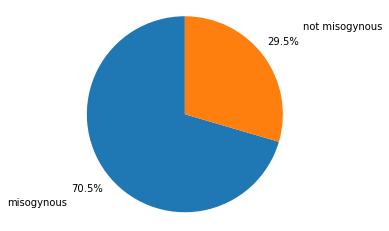

In [69]:
fig1, ax1 = plt.subplots()
ax1.pie(df['misogynous'].value_counts(), labels=['misogynous','not misogynous'], autopct='%1.1f%%', startangle=90, pctdistance=1.25, labeldistance=1.5)
ax1.axis('equal')

plt.show()